# Hypothesis # 1

In [3]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [4]:
# Reload the dataset
df = pd.read_csv('../data/clean/df_cleaned.csv')
print(df.shape)
df.head()

(321187, 14)


,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,visitor_id,visit_id,process_step,date_time
0,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:51:13
1,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:47:50
2,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:46:45
3,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,step_3,2017-04-02 11:23:08
4,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,step_2,2017-04-02 11:22:24


### Hypothesis Testing

Hypothesis 1: Completion rate (true/false) for each control group- H0: The completion rate for the test group is equal to or smaller than the completion rate for the control group.
- → completion_rate_test <= completion_rate_control

- H1: The completion rate for the test group is higher than the completion rate for the control group.
- → completion_rate_test > completion_rate_control
l .

significance alpha = 0.05

→ If pvalue >=  0.05, we’ll keep the H0.
 If =p-value <  0.05, we’ll reject H0 and keep H1Two
Test: One-sided two proportion z test
→ check extra material

In [7]:
# Split data into control and test groups and return counts of total users and total users having completed the online process.

def df_split(df):
    """
    (1) Outer function splits dataframe into a test and a control group.
    (2) Inner function serves both new dataframes to count total users and total users having completed the online process.
    (3) Running the inner function, it returns a list each containing the counts of total users and the count of total users 
    having completed the onlineprocess.
    (4) Outer function returns these counts for the test and the control group.  
    """
    test_group = df[df['Variation'] == 'Test']
    control_group = df[df['Variation'] == 'Control']

    def compute_completion_rate(df_test_or_control):
        total_users = df_test_or_control['client_id'].nunique()
        confirm_users = df_test_or_control[df_test_or_control['process_step'] == 'confirm']['client_id'].nunique()
        return confirm_users, total_users
        
    completion_rate_test = compute_completion_rate(test_group)
    completion_rate_control = compute_completion_rate(control_group)

    return completion_rate_test, completion_rate_control


In [9]:
# Call function to return counts of total users and total users having completed the online process

completion_rate_test, completion_rate_control = df_split(df)

In [11]:
# Run two-sample proportion z Test (one-tailed / right-tailed)

def hypothesis_2_testing(completion_rate_test, completion_rate_control):
    
    stat, pval = sm.stats.proportions_ztest(
        count=[completion_rate_test[0], completion_rate_control[0]], 
        nobs=[completion_rate_test[1], completion_rate_control[1]], 
        alternative='larger' 
    )
    
    print(f"T Statistics: {stat}")
    print(f"p-Value: {pval}")

    if pval >= 0.05:
        print("H0 is maintained: There is NOT significant evidence that the completion rate for the test group is higher than for the control group.")
    else:
        print("Reject H0: There IS significant evidence that the completion rate for the test group is higher than for the control group.")


In [39]:
test_results = hypothesis_2_testing(completion_rate_test, completion_rate_control)
test_results

T Statistics: 8.905092110189155
p-Value: 2.6670868513870886e-19
Reject H0: There IS significant evidence that the completion rate for the test group is higher than for the control group.


- The large Z value of 8.90 indicates a very significant difference between the two groups' completion rates. The positive value suggests that the completion rate observed in the test group is higher than that in the control group.
- The extremely low p-value suggests there is statistically significant evidence to conclude that the completion rate in the test group is not equal to the completion rate in the control group. We can reject the Null-Hypothesis. 

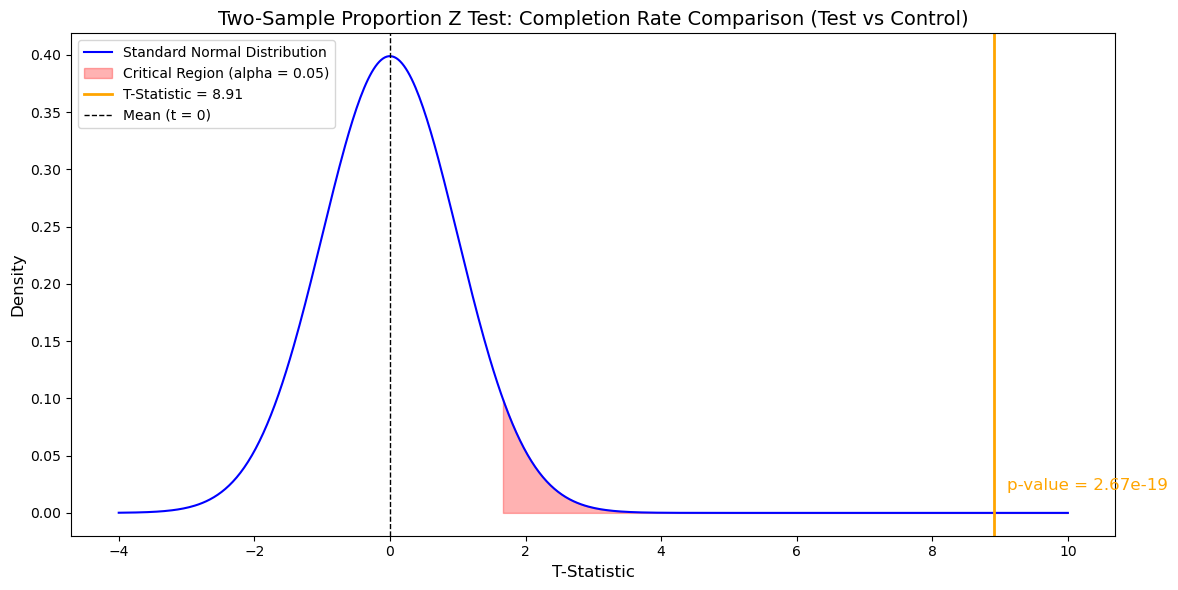

In [13]:
# Parameters
alpha = 0.05  # Significance level
critical_value = norm.ppf(1 - alpha)  # Critical t-value for one-tailed test
t_statistic = 8.905092110189155  # T-statistic from your test
p_value = 2.6670868513870896e-19  # p-value from your test

# Generate data for the standard normal distribution
x = np.linspace(-4, 10, 500)
y = norm.pdf(x, 0, 1)

# Plot the normal distribution curve
plt.figure(figsize=(12, 6))
plt.plot(x, y, label='Standard Normal Distribution', color='blue')

# Highlight critical region
plt.fill_between(x, 0, y, where=(x >= critical_value), color='red', alpha=0.3, label=f"Critical Region (alpha = {alpha})")

# Add vertical line for the observed t-statistic
plt.axvline(t_statistic, color='orange', linewidth=2, label=f"T-Statistic = {t_statistic:.2f}")

# Add legend, labels, and title
plt.title("Two-Sample Proportion Z Test: Completion Rate Comparison (Test vs Control)", fontsize=14)
plt.xlabel("T-Statistic", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.axvline(0, color='black', linestyle='--', linewidth=1, label="Mean (t = 0)")
plt.legend(fontsize=10, loc='upper left')
plt.text(t_statistic + 0.2, 0.02, f"p-value = {p_value:.2e}", fontsize=12, color='orange')

# Show the plot
plt.tight_layout()
plt.savefig("../figures/z-test.jpeg", format="jpeg", dpi=300)
plt.show()

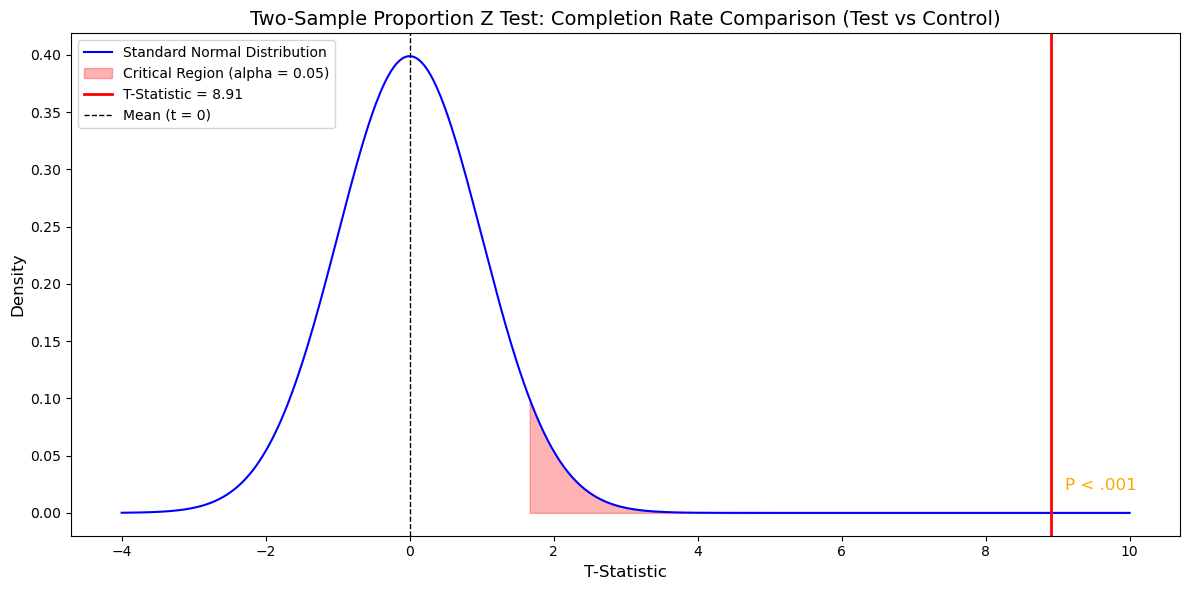

In [17]:
# Parameters
alpha = 0.05  # Significance level
critical_value = norm.ppf(1 - alpha)  # Critical t-value for one-tailed test
t_statistic = 8.905092110189155  # T-statistic from your test
p_value = 2.6670868513870896e-19  # p-value from your test

# Generate data for the standard normal distribution
x = np.linspace(-4, 10, 500)
y = norm.pdf(x, 0, 1)

# Function to format p-value
def format_pval(p_val):
    if p_val < 0.001:
        return "P < .001"
    else:
        return f"P = {p_val:.3f}"

# Format the p-value
formatted_pval = format_pval(p_value)

# Plot the normal distribution curve
plt.figure(figsize=(12, 6))
plt.plot(x, y, label='Standard Normal Distribution', color='blue')

# Highlight critical region
plt.fill_between(x, 0, y, where=(x >= critical_value), color='red', alpha=0.3, label=f"Critical Region (alpha = {alpha})")

# Add vertical line for the observed t-statistic
plt.axvline(t_statistic, color='red', linewidth=2, label=f"T-Statistic = {t_statistic:.2f}")

# Add legend, labels, and title
plt.title("Two-Sample Proportion Z Test: Completion Rate Comparison (Test vs Control)", fontsize=14)
plt.xlabel("T-Statistic", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.axvline(0, color='black', linestyle='--', linewidth=1, label="Mean (t = 0)")
plt.legend(fontsize=10, loc='upper left')

# Annotate the formatted p-value
plt.text(t_statistic + 0.2, 0.02, f"{formatted_pval}", fontsize=12, color='orange')

# Show the plot
plt.tight_layout()
plt.savefig("../figures/z-test-formatted-pval.jpeg", format="jpeg", dpi=300)
plt.show()


### NOTES

In [14]:
# Preparing data - single steps

In [5]:
def df_split(df):
    test_group = df[df['Variation'] == 'Test'].copy()
    control_group = df[df['Variation'] == 'Control'].copy()

    print(f"Test group dataframe: {test_group.shape}")
    print(f"Control group dataframe: {control_group.shape}")

    display(test_group.head())
    display(control_group.head())

In [7]:
df_split(df)

Test group dataframe: (177779, 14)
Control group dataframe: (143408, 14)


,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,visitor_id,visit_id,process_step,date_time
0,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:51:13
1,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:47:50
2,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:46:45
3,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,step_3,2017-04-02 11:23:08
4,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,step_2,2017-04-02 11:22:24


,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,visitor_id,visit_id,process_step,date_time
11,2304905,7.0,94.0,58.0,U,2.0,110860.3,6.0,9.0,Control,336210275_56978226960,724930510_65323235593_692754,confirm,2017-05-21 11:07:16
12,2304905,7.0,94.0,58.0,U,2.0,110860.3,6.0,9.0,Control,336210275_56978226960,724930510_65323235593_692754,step_3,2017-05-21 11:04:53
13,2304905,7.0,94.0,58.0,U,2.0,110860.3,6.0,9.0,Control,336210275_56978226960,724930510_65323235593_692754,step_2,2017-05-21 11:04:04
14,2304905,7.0,94.0,58.0,U,2.0,110860.3,6.0,9.0,Control,336210275_56978226960,724930510_65323235593_692754,step_1,2017-05-21 11:03:31
15,2304905,7.0,94.0,58.0,U,2.0,110860.3,6.0,9.0,Control,336210275_56978226960,724930510_65323235593_692754,start,2017-05-21 11:03:25


In [9]:
def compute_completion_rate(df_test_or_control):
    total_users = df_test_or_control['client_id'].nunique()
    confirm_users = df_test_or_control[df_test_or_control['process_step'] == 'confirm']['client_id'].nunique()
    return [total_users, confirm_users]